### scikit-learnでの回帰分析

In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import sklearn as sk

scikit-learnのデータセット"Boston house-prices"から、住宅価格を推定する。
使用するアルゴリズムは以下の通り

1. 線形回帰
1. ガウス基底カーネル
1. ガウス過程回帰
1. ガウス基底カーネル（with 確率的勾配降下法）
1. RANSACアルゴリズムによるはずれ値の検出

それぞれの結果について、R^2決定係数と、平均2乗誤差、平均絶対誤差を出力する。

$R^2=1-\dfrac{\sum_{i=1}^n(y\_true-y\_pred)^2}{\sum_{i=1}^n(y\_true-\mu_Y)^2}$

$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y\_true-y\_pred)^2$

$\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y\_true-y\_pred|$

R^2決定係数について、第2項の分母は全変動と呼ばれ、回帰モデルと実測値とのズレを表す。
最小2乗法の線形回帰では、相関係数と値が一致する。

In [2]:
# 推定結果のスコア表示
def print_score(model, x_test, y_test):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    
    y_pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    print(f"R^2:{score}")
    
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    print(f"MSE:{mse}")
    
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    print(f"MAE:{mae}")    

In [3]:
%matplotlib notebook

# 正解と推定結果のグラフ表示
def show_predict(model, x_test, y_test, figname='label-predict map', mask=None):
    import matplotlib.pyplot as plt

    y_pred = model.predict(x_test)
    fig = plt.figure(figsize=(5,5))
    # 基準線の出力
    plt.plot(y_test, y_test)
    # 結果の出力
    if mask is None:
        plt.scatter(y_test, y_pred, c='c')
    else:
        not_mask = np.logical_not(mask)
        plt.scatter(y_test[mask], y_pred[mask], c='c')
        plt.scatter(y_test[not_mask], y_pred[not_mask], c='m')
                
    plt.title(figname)
    plt.xlabel("label")
    plt.ylabel("pred")
    plt.show()

In [4]:
# データセットの表示
import sklearn.datasets
boston_set = sklearn.datasets.load_boston()
pd.DataFrame(np.column_stack((boston_set.data, boston_set.target.reshape(-1,1))), columns=np.append(boston_set.feature_names,'PRICE') )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [5]:
# 学習とテストデータの分離
from sklearn.model_selection import train_test_split

boston_x_train, boston_x_test, boston_y_train, boston_y_test = \
    train_test_split(boston_set.data, boston_set.target, test_size=0.2, random_state=None)

#### 線形回帰

R^2:0.7390438483860167
MSE:[ 24.15314425]
MAE:[ 3.28881267]


<IPython.core.display.Javascript object>


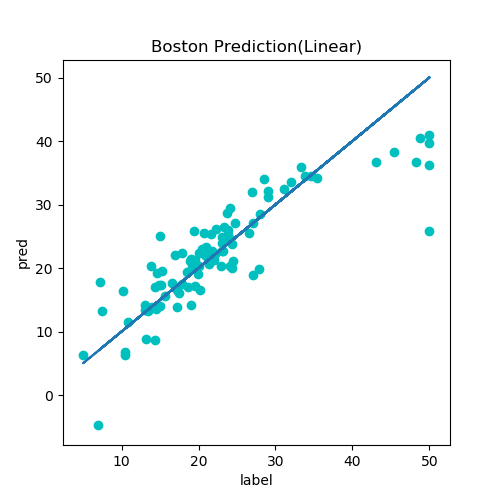

In [6]:
# 学習と推定
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(boston_x_train, boston_y_train)
print_score(linear_model, boston_x_test, boston_y_test)
show_predict(linear_model, boston_x_test, boston_y_test, "Boston Prediction(Linear)")

#### ガウス基底カーネル

In [7]:
# 学習、テストデータの正規化
from sklearn.preprocessing import StandardScaler

boston_scaler = StandardScaler()
boston_scaler.fit(boston_x_train)

boston_x_train_std = boston_scaler.transform(boston_x_train)
boston_x_test_std = boston_scaler.transform(boston_x_test)

R^2:0.8717945860670557
MSE:[ 11.86622288]
MAE:[ 2.48579601]


<IPython.core.display.Javascript object>


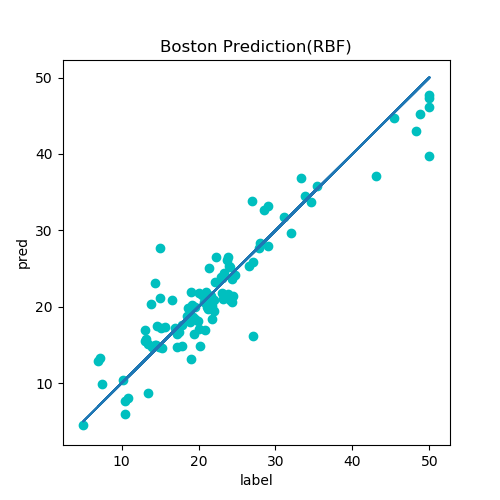

In [8]:
# 学習と推定
from sklearn.kernel_ridge import KernelRidge

rbf_model = KernelRidge(kernel='rbf',alpha=0.001, gamma=0.01)
rbf_model.fit(boston_x_train_std, boston_y_train)
print_score(rbf_model, boston_x_test_std, boston_y_test)
show_predict(rbf_model, boston_x_test_std, boston_y_test, "Boston Prediction(RBF)")

In [9]:
# パラメータ調整
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

rbf_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
rbf_grid = [{'alpha': rbf_range, 'gamma': rbf_range}]
boston_gs = GridSearchCV(estimator = KernelRidge(kernel='rbf'),
                  param_grid = rbf_grid, cv=10, n_jobs=-1)
boston_gs.fit(boston_x_train_std, boston_y_train)

print("cross validation R^2:{}".format(boston_gs.best_score_) )
print("best alpha:{}".format(boston_gs.best_params_['alpha']) )
print("best gamma:{}".format(boston_gs.best_params_['gamma']) )

cross validation R^2:0.8706821260372932
best alpha:0.001
best gamma:0.01


#### ガウス過程

R^2:0.5199246365004604
MSE:[ 44.43401482]
MAE:[ 4.43100423]


<IPython.core.display.Javascript object>


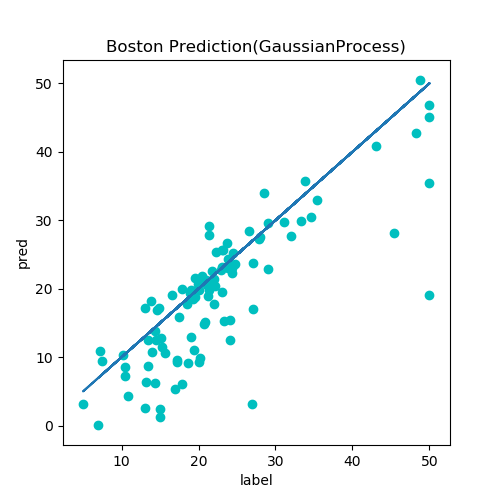

In [10]:
# 学習と推定
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

kernel = RBF()
gp_model = GaussianProcessRegressor(kernel=kernel)
gp_model.fit(boston_x_train_std, boston_y_train)

print_score(gp_model, boston_x_test_std, boston_y_test)
show_predict(gp_model, boston_x_test_std, boston_y_test, "Boston Prediction(GaussianProcess)")

#### ガウス基底カーネル（with 確率的勾配降下法）

R^2:0.7046630697743346
MSE:[ 27.33530302]
MAE:[ 4.19155317]


<IPython.core.display.Javascript object>


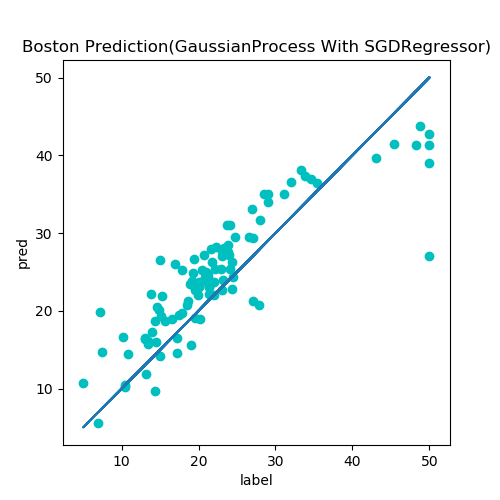

In [11]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.metrics.pairwise import rbf_kernel

gamma = 0.01
boston_k_train = rbf_kernel(boston_x_train_std, boston_x_train_std, gamma=gamma) + 1e-2*np.eye(boston_x_train_std.shape[0])
boston_k_test = rbf_kernel(boston_x_test_std, boston_x_train_std, gamma=gamma)

gauss_reg = SGDRegressor(max_iter=1000)
gauss_reg.fit(boston_k_train, boston_y_train)    

print_score(gauss_reg, boston_k_test, boston_y_test)
show_predict(gauss_reg, boston_k_test, boston_y_test, "Boston Prediction(GaussianProcess With SGDRegressor)")

#### RANSACアルゴリズムによるはずれ値の検出

<IPython.core.display.Javascript object>


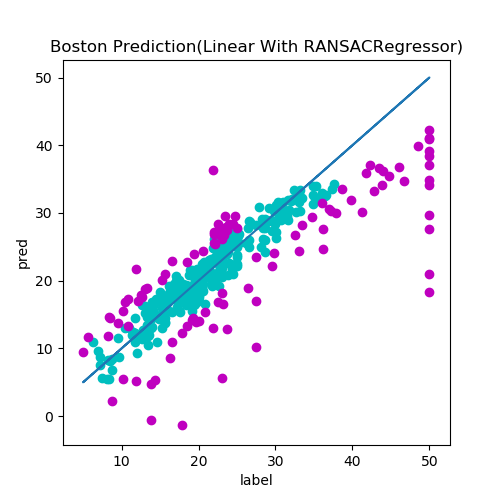

In [12]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac_reg = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50)
ransac_reg.fit(boston_x_train_std, boston_y_train)
mask = ransac_reg.inlier_mask_

show_predict(ransac_reg, boston_x_train_std, boston_y_train, "Boston Prediction(Linear With RANSACRegressor)", mask)